In [4]:
import numpy as np
import scipy as sp
import sympy as sy

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

from sympy import *

In [131]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()

blues = mpl.colormaps["Blues"].resampled(12)
purples = mpl.colormaps["Purples"].resampled(22)
reds = mpl.colormaps["Reds"].resampled(12)
orange = mpl.colormaps["YlOrBr"].resampled(22)
green = mpl.colormaps["YlGn"].resampled(12)
spectrum = mpl.colormaps["viridis"].resampled(10)

In [132]:
c_blues = [blues(i) for i in range(12)]
c_purp = [purples(i) for i in range(22)]
c_red = [reds(i) for i in range(12)]
c_orag = [orange(i) for i in range(22)]
c_spec = [spectrum(i) for i in range(10)]
c_gree = [green(i) for i in range(12)]

## Symbol define

In [80]:
#Cj, Cp, Cx = sy.symbols('Cj Cp Cx')
# a = sy.Function('a') // Structure check using Sympy
Cj = 1
Cp = 1
Cx = 1
lx = 1

a = Cx/Cp

const = 1
N = 5

## Matrix define

### Matrix: Size over 2 code

In [146]:
Matrix_size = 3

#A = sy.zeros(Matrix_size,Matrix_size) // Structure check using Sympy
#D = sy.zeros(Matrix_size,Matrix_size) // Structure check using Sympy

A = np.zeros((Matrix_size,Matrix_size))
D = np.zeros((Matrix_size,Matrix_size))

for i in range(1,Matrix_size):
    if i==1:
        A[i,i] = a
    else:
        A[i,i] = 1

A[0,0] = 1/Cj
A[0,1] = 1/Cj
A[1,0] = 1/Cj

A = A/Cx

In [147]:
#ABA = sy.zeros(Matrix_size-1,Matrix_size-1) // Sturcture check using Sympy
ABA = np.zeros((Matrix_size-1,Matrix_size-1))

for i in range(1,Matrix_size-1):
    for j in range(1,Matrix_size-1):
        if i==j:
            ABA[i,j] = 2
            ABA[i,j-1] = -1
            ABA[i-1,j] = -1
            if i==Matrix_size-2:
                ABA[i,j] = 1

ABA[0,0] = a
ABA[0,1] = a**0.5
ABA[1,0] = a**0.5

ABA = ABA/Cx

### Matrix: D

In [148]:
ABAval, ABAvec = np.linalg.eig(ABA)

In [149]:
Abar = np.delete(np.delete(A, 0, axis=0), 0, axis=1)
Dbar = const**0.5 * (Abar @ ABAvec)

In [150]:
Dbar

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

## Supply Formula for Eigenvalue and Eigenvector

### Eigenvector, Eigenvalue sim

In [115]:
def S_vec_return(i,N):
    kappa = i*np.pi/N
    #print("kappa value: ", kappa)

    S_1 = Cp/Cj
    S_2 = (2/(N*Cx))**0.5
    S_3 = (1/(1+(2*Cp*np.tan(kappa/2)/Cx)**2))**0.5

    S_vec = S_1*S_2*S_3/(const**2)
    #print("S_vec value: ", S_vec)

    return S_vec

def S_val_return(i,N):
    kappa = i*np.pi/N

    S_1 = const/2
    S_2 = (4*(np.sin(kappa/2)**2))/(lx*Cx)

    S_val = S_1 * S_2

    return S_val

### Plt array

In [143]:
N = 10

S_vec_arr = []
S_val_arr = []
N_arr = [i for i in range(1,N+1,1)]

for n in range(N):
    S_vec_arr.append(S_vec_return(n,N))
    S_val_arr.append(S_val_return(n,N))


#### Plt array: Eigenvec

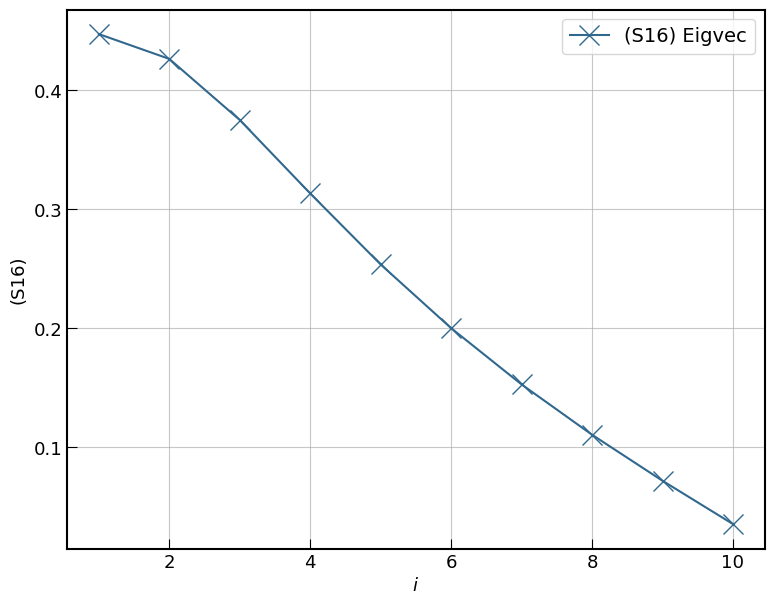

In [144]:

fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 1.5
plt.rcParams.update({'font.size': 13})

plt.xlabel(r'$i$')
plt.ylabel(r'(S16)')


plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)

plt.plot(N_arr,S_vec_arr,color=c_spec[3],label = r"(S16) Eigvec", marker = 'x', markersize = 15, linewidth = 1.5)

plt.grid(alpha=0.7)
plt.legend(ncol=2,fontsize=14)

#### Plt array: Eigenval

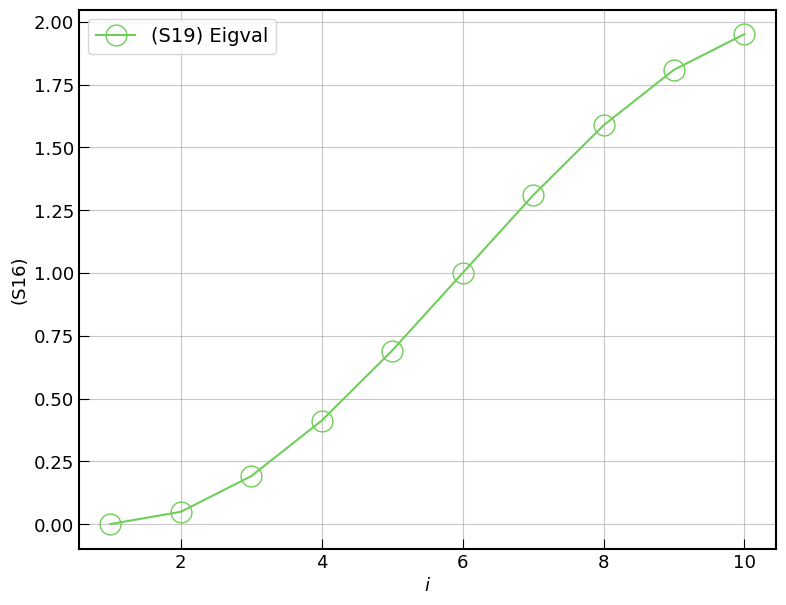

In [145]:

fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 1.5
plt.rcParams.update({'font.size': 13})

plt.xlabel(r'$i$')
plt.ylabel(r'(S16)')

plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)

plt.plot(N_arr,S_val_arr,color=c_spec[7],label = r"(S19) Eigval", marker = 'o', mfc ='None', markersize = 15, linewidth = 1.5)

plt.grid(alpha=0.7)
plt.legend(ncol=2,fontsize=14)